#Binary Classification of Pizza/Steak using Convolutional neural networks and computer vision using tensorflow 


In [ ]:
#get the data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref= zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


--2022-10-22 08:18:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 142.250.4.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   163MB/s    in 0.6s    

2022-10-22 08:18:24 (163 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
#visualize the images

In [ ]:
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names= np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names[:]

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  #setup the target directory to view images
  target_folder= target_dir+target_class

  #get a random image path
  #os.listdir(target_folder) return the whole list of images
  random_image= random.sample(os.listdir(target_folder),1)

  #read and plot img using matplotlib
  img= mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  print(f"image shape{img.shape}")
  plt.axis("off");

  return img

image shape(512, 512, 3)


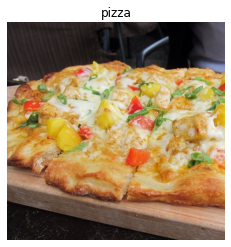

In [ ]:
#view image from training dataset
img=view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

In [ ]:
img.shape # (width,height,color channels)

(512, 512, 3)

#end to end example of cnn model
#lets build it!

#1.load images
#2.preprocess the images
#3.compile our cnn
#4.fit the cnn on our training data


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#tf random setseed
tf.random.set_seed(42)

#preprocess the data ie scalling or normalizing
train_datagen= ImageDataGenerator(rescale=1./255)
valid_datagen= ImageDataGenerator(rescale=1./255)

#setup paths to our data directories
train_dir="/content/pizza_steak/train"
test_dir="pizza_steak/test"

#import data from directories and turn into batches
train_data= train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              seed=42,
                                              class_mode="binary")

valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              seed=42,
                                              class_mode="binary")

#build a cnn model(same as the tine VGG as the cnn explainer website)

model_1= tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation='relu',
                         input_shape=(224,224,3)),

   tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation='relu',
                         ),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),


  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation='relu',
                         ),
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation='relu',
                         ),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            ),
                            

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1,activation="sigmoid")

])
#compile our cnn
model_1.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_1=model_1.fit(train_data_augmented,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 33s 481ms/step - loss: 0.6608 - accuracy: 0.5840 - val_loss: 0.5644 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 23s 489ms/step - loss: 0.5213 - accuracy: 0.7473 - val_loss: 0.3660 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 22s 473ms/step - loss: 0.4819 - accuracy: 0.7820 - val_loss: 0.3692 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 22s 470ms/step - loss: 0.4637 - accuracy: 0.7847 - val_loss: 0.3547 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 22s 471ms/step - loss: 0.4519 - accuracy: 0.8020 - val_loss: 0.3929 - val_accuracy: 0.8200


#lets break down our binary classification


image shape(512, 306, 3)
image shape(512, 512, 3)


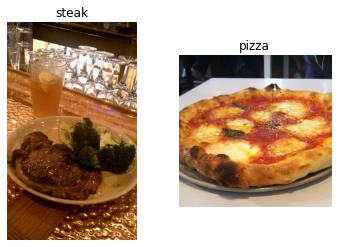

In [ ]:
#visualise our data
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
steak_img=view_random_image("pizza_steak/train/","pizza")


In [ ]:
#define directory datset paths
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

In [ ]:
#convertdata into bathches
# a batch is the subset of the data. Rather than looking at 10000 images at a time, the computr will look at 32
# images.
# This is done because the processor(Gpu ) may not have enough memory to look at 10k images or more.Trying to learn the patterns from all 
# 10k images at a time, might not learn very well

#why 32?
# its told by yann leCun and we will listen to him :)





#preprocessing the data


In [ ]:
#crete train and test data generators and rescale it
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)



In [ ]:
#load images from directories and convert thrm into batches
#target size reshapes the dimensions of the images
train_data=train_datagen.flow_from_directory(directory=train_dir, target_size=(224,224),class_mode="binary", batch_size=32)
test_data=train_datagen.flow_from_directory(directory=test_dir, target_size=(224,224),class_mode="binary", batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#get the sample of train image batch
image,labels=train_data.next()
len(image),len(labels)

(32, 32)

In [ ]:
#create a  CNN model(make it simple)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [ ]:
model_2=Sequential([
  Conv2D(filters=10,
         strides=1,
         kernel_size=3,
         padding="valid",
         activation="relu",
         input_shape=(224,224,3),

         ),
  Conv2D(10,3,activation="relu"),
  Conv2D(10,3,activation="relu"),
  Flatten(),
  Dense(1,activation="sigmoid")

])


In [ ]:
#compile the model
model_2.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])

In [ ]:
#fit the model
history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 217ms/step - loss: 0.7672 - accuracy: 0.7240 - val_loss: 0.4032 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3860 - accuracy: 0.8313 - val_loss: 0.4084 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.2659 - accuracy: 0.9007 - val_loss: 0.3923 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 9s 196ms/step - loss: 0.1401 - accuracy: 0.9520 - val_loss: 0.3872 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 0.0740 - accuracy: 0.9820 - val_loss: 0.4946 - val_accuracy: 0.7980


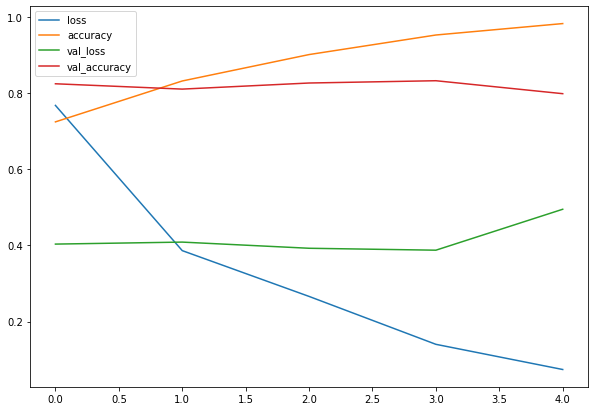

In [ ]:
import pandas as pd
pd.DataFrame(history_2.history).plot(figsize=(10,7))


In [ ]:
# fitting of machine learning model comes in 3 parts
# 1 create a baseline 
# 2. beat the baseline by overfitting a larger model
# 3. reduce overfitting

# ways to induce overfitting
#  increase the number of conv layers
# increase the number of conv filters
# add another dense layer to the op of the flattened layer

# ways to reduce overfitting

# 1. data augmentation
# 2. add regularization layers such as MaxPool2D--> means reducing overfitting
# 3.add more data.....



In [ ]:
model_3=Sequential([
  Conv2D(filters=10,
         strides=1,
         kernel_size=3,
         padding="valid",
         activation="relu",
         input_shape=(224,224,3),

         ),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1,activation="sigmoid")

])


In [ ]:
#compile the model
model_3.compile(optimizer=Adam(),metrics=["accuracy"],loss="binary_crossentropy")

In [ ]:
#fit model on the data
history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6064 - accuracy: 0.6867 - val_loss: 0.4590 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 10s 217ms/step - loss: 0.4585 - accuracy: 0.7880 - val_loss: 0.3528 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4062 - accuracy: 0.8200 - val_loss: 0.3598 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 10s 216ms/step - loss: 0.3875 - accuracy: 0.8327 - val_loss: 0.3235 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 10s 208ms/step - loss: 0.3536 - accuracy: 0.8520 - val_loss: 0.3827 - val_accuracy: 0.8220


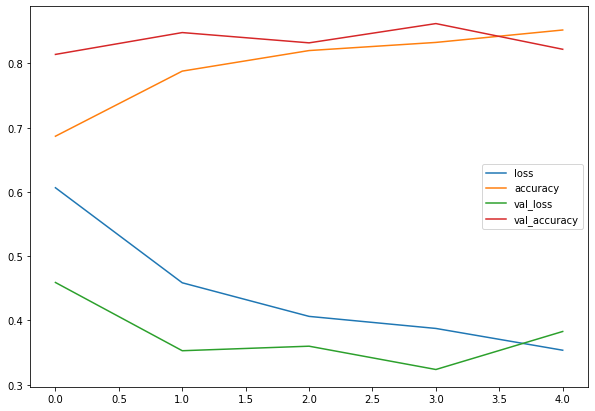

In [ ]:
#plot
pd.DataFrame(history_3.history).plot(figsize=(10,7))

In [ ]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 10)      

# Augmenting the data

In [ ]:
#data augmentation means altering the training data (rotating, cropping, etc) succh that the model performs better.

In [ ]:
# make a augmented data generator
train_datagen_augmented=ImageDataGenerator(rescale=1./255,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           horizontal_flip=True)
# make a unaugmented data generator
train_datagen=ImageDataGenerator(rescale=1./255)

#test data genrator without augmentation
test_datagen=ImageDataGenerator(rescale=1./255)



In [ ]:

#augemnted training data
train_data_augmented=train_datagen_augmented.flow_from_directory(directory=train_dir, target_size=(224,224),class_mode="binary", batch_size=32,shuffle=True)

#
train_data=train_datagen.flow_from_directory(directory=train_dir, target_size=(224,224),class_mode="binary", batch_size=32,shuffle=False)
#unaugmented test data
test_data=train_datagen.flow_from_directory(directory=test_dir, target_size=(224,224),class_mode="binary", batch_size=32)


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#get next batch sample data batches
images,labels= train_data.next()
aug_images,aug_labels=train_data_augmented.next()

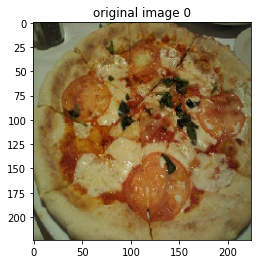

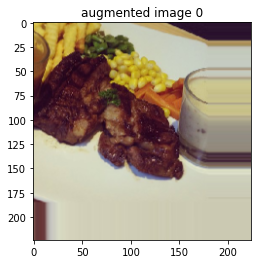

In [ ]:

import random
rand_number=random.randint(0,32)
plt.title(f"original image {rand_number}")
rand_number
plt.imshow(images[rand_number])

plt.figure()
plt.title(f"augmented image {rand_number}")
plt.imshow(aug_images[rand_number])


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPool2D
from tensorflow.keras.optimizers import Adam

In [ ]:
model_4=Sequential([
  Conv2D(filters=10,
         strides=1,
         kernel_size=3,
         padding="valid",
         activation="relu",
         input_shape=(224,224,3),

         ),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1,activation="sigmoid")

])

#compile the model
model_4.compile(optimizer=Adam(),metrics=["accuracy"],loss="binary_crossentropy")

##fit model on the data
history_4=model_4.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 63s 1s/step - loss: 0.6200 - accuracy: 0.6480 - val_loss: 0.5661 - val_accuracy: 0.6800
Epoch 2/5
47/47 [==============================] - 68s 1s/step - loss: 0.5233 - accuracy: 0.7453 - val_loss: 0.3567 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 65s 1s/step - loss: 0.4786 - accuracy: 0.7787 - val_loss: 0.3732 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 63s 1s/step - loss: 0.4601 - accuracy: 0.7873 - val_loss: 0.3585 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 64s 1s/step - loss: 0.4444 - accuracy: 0.8007 - val_loss: 0.3387 - val_accuracy: 0.8620


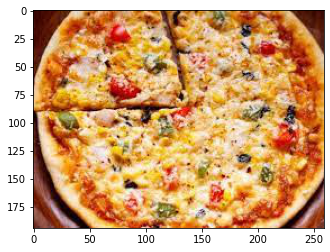

In [ ]:
import matplotlib.image as mpimg
pizza=mpimg.imread("pizza.jpg")
plt.imshow(pizza)
# plt.axis(False);

In [ ]:
pizza.shape

(194, 259, 3)

In [ ]:
#function to prepare image for custom prediction
def load_prep_imgage(filename,img_shape=224):
  #reads an image from filename and converts it into a tensor of (img_shape,img_shape,color channels)
  #read in the image using tensorflow
  img=tf.io.read_file(filename)
  #decode the read file into tensor
  img=tf.image.decode_image(img)
  #resize the image
  img=tf.image.resize(img,size=[img_shape,img_shape])
  #rescale the img and get all values between 0 and 1
  img=img/255.
  return img

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

Function to predict on Custom Images

In [ ]:
def pred_plot(filename,model,class_names=class_names):
  #load preprocessed image
  img=load_prep_imgage(filename)
  #make a prediction
  pred=model.predict(tf.expand_dims(img,axis=0))

  #get the predicted class
  pred_class=class_names[int(tf.round(pred))]

  #plot the img and predicted class]
  plt.imshow(img)
  plt.title(f"Your image is a : {pred_class}")
  plt.axis(False);
